In [ ]:
#Exploratory Data Analysis - Plant Disease Classification

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

In [4]:
DATASET_PATH = r"C:\dataset_FINAL"
classes =  os.listdir(DATASET_PATH)
print("Number of classes: ", len(classes))

Number of classes:  38


The dataset contains 38 disease classes, each representing a specific crop–disease combination.

In [6]:
class_counts = {}

for i in classes:
    class_path = os.path.join(DATASET_PATH, i)
    class_counts[i] = len(os.listdir(class_path))

class_counts

{'Apple___Apple_scab': 4032,
 'Apple___Black_rot': 3974,
 'Apple___Cedar_apple_rust': 3520,
 'Apple___healthy': 4016,
 'Blueberry___healthy': 3632,
 'Cherry_(including_sour)___healthy': 3652,
 'Cherry_(including_sour)___Powdery_mildew': 3366,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 3284,
 'Corn_(maize)___Common_rust_': 3814,
 'Corn_(maize)___healthy': 3718,
 'Corn_(maize)___Northern_Leaf_Blight': 3816,
 'Grape___Black_rot': 3776,
 'Grape___Esca_(Black_Measles)': 3840,
 'Grape___healthy': 3384,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 3444,
 'Orange___Haunglongbing_(Citrus_greening)': 4020,
 'Peach___Bacterial_spot': 3676,
 'Peach___healthy': 3456,
 'Pepper,_bell___Bacterial_spot': 3826,
 'Pepper,_bell___healthy': 3976,
 'Potato___Early_blight': 3878,
 'Potato___healthy': 3648,
 'Potato___Late_blight': 3878,
 'Raspberry___healthy': 3562,
 'Soybean___healthy': 4044,
 'Squash___Powdery_mildew': 3472,
 'Strawberry___healthy': 3648,
 'Strawberry___Leaf_scorch': 3548,
 '

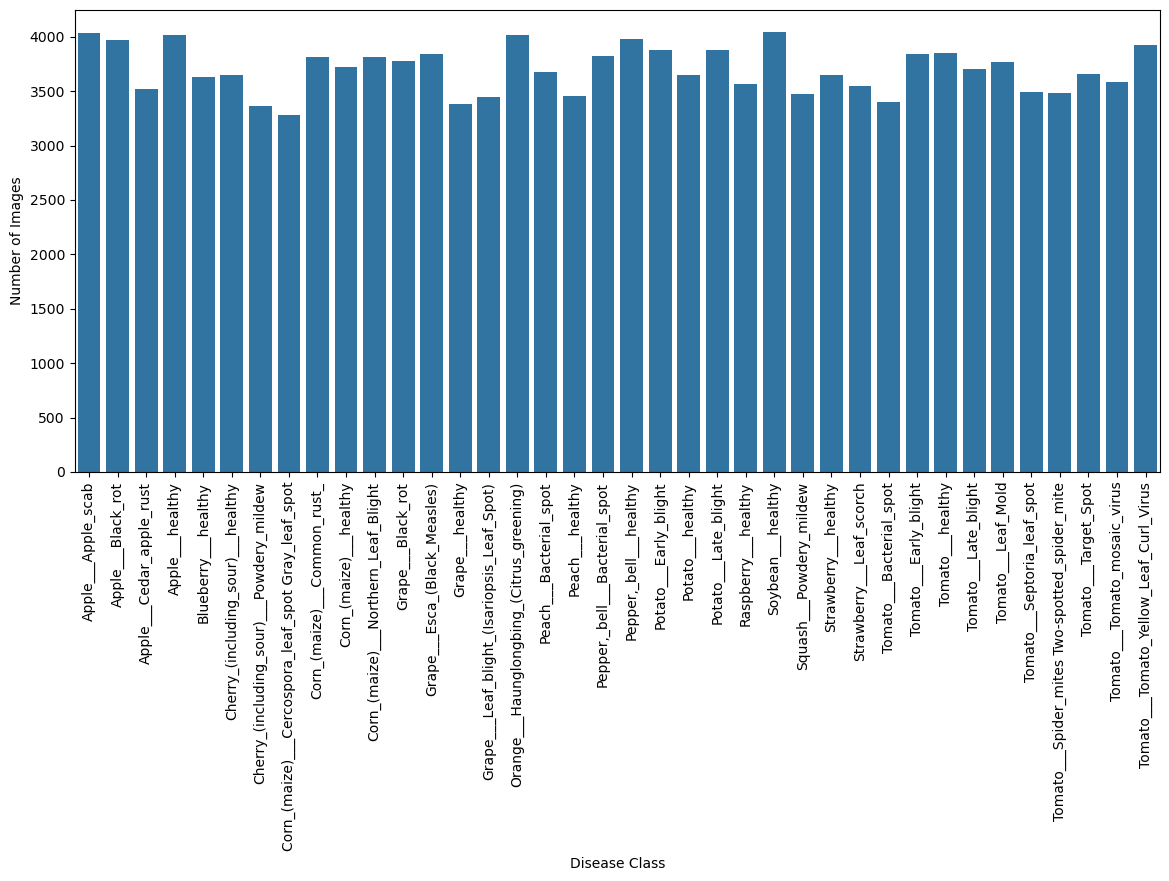

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.savefig("../results/class_distribution.png", bbox_inches = "tight")
plt.show()

Overpresented classes: 
1. Apple___scab
2. Apple___healthy
3. Orange___Haunglongbing (Citrus greening)
4. Pepper_bell___healthy
5. Soybean___healthy
6. Tomato___Leaf_Curl_Virus
7. Tomato___Early_blight
8. Grape___Black_rot
9. Corn_(maize)___healthy

Underpresented classes:
1. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
2. Cherry_(including_sour)___Powdery_mildew
3. Grape___healthy
4. Strawberry___Leaf_scorch
5. Squash___Powdery_mildew
6. Tomato___Septoria_leaf_spot
7. Tomato___Spider_mites Two-spotted_spider_mite
8. Peach___Bacterial_spot

Possible Bias:
1. Model bias towards frequent classes
2. Misclassification risk
3. Evaluation metric disortion

Class imbalance may cause the model to favor diseases with more samples, requiring augmentation strategies.

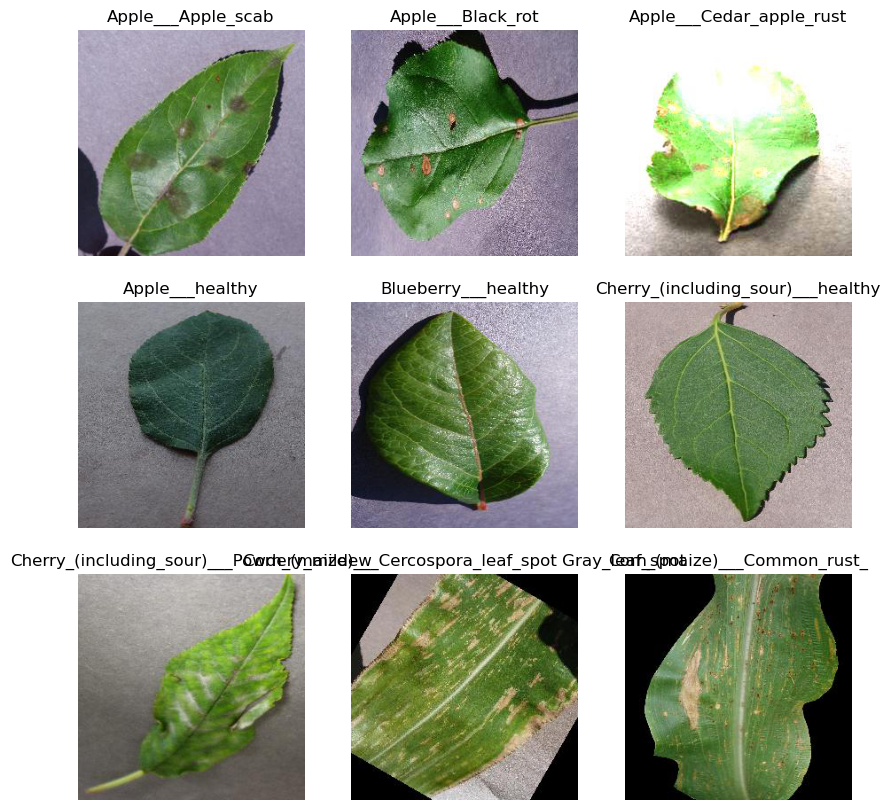

In [8]:
plt.figure(figsize=(10,10))

for i, j in enumerate(classes[:9]):
    img_path = os.path.join(DATASET_PATH, j, os.listdir(os.path.join(DATASET_PATH, j))[0])
    img = Image.open(img_path)

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(j)
    plt.axis('off')

plt.show()

In [19]:
widths, heights = [], []

for i in classes[:5]:
    for j in os.listdir(os.path.join(DATASET_PATH, i))[:20]:
        img = Image.open(os.path.join(DATASET_PATH, i, j))
        w,h = img.size
        widths.append(w)
        heights.append(h)

print("Avg widths: ", np.mean(widths))
print("Avg heights: ", np.mean(heights)) 

Avg widths:  256.0
Avg heights:  256.0


## Key Insights from EDA

- Dataset contains 38 plant disease classes
- Noticeable class imbalance among diseases
- Leaf images show variation in lighting and orientation
- Image sizes are consistent
- Data augmentation will be necessary for robust generalization 